# Stochastic Gradient Descent

We will use the house price prediction dataset available on kaggle ([House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/)).

I strongly suggest, as additional reading, exploring the notebooks from this competition and learning from the competitors and perhaps even participating in the competition!

## Importing Libs

In [33]:
# Standard libs
import numpy as np
import pandas as pd

# Dataviz libs
import seaborn as sns
import matplotlib.pyplot as plt

# model selection libs
from sklearn.model_selection import train_test_split

# feature-engine libs
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.wrappers import SklearnTransformerWrapper

# preprocessing data libs
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# machine learning models
from sklearn.linear_model import SGDRegressor

# machine learning metrics libs
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error

## Loading data

In [16]:
df = pd.read_csv('/Users/dellacorte/py-projects/data-science/supervised-learning-regression-reference/databases/house-price.csv', sep=";")
df.head()

,zoneamento,tam_terreno,forma_terreno,qualidade_geral,condicao,ano_construcao,qualidade_aquecedor,ar_condicionado,tam_primeiro_andar,tam_segundo_andar,...,qtde_banheiros,qtde_comodos,qtde_lareiras,qtde_carros_garagem,tam_garagem,tam_piscina,qualidade_piscina,mes_venda,ano_venda,preco
0,RL,785.03035,Reg,7,5,2003,Ex,Y,79.524968,79.339162,...,30,8,0,2,50.910844,0.0,NotAv,2,2008,8.465100e+05
1,RL,891.86880,Reg,6,8,1976,Ex,Y,117.243586,0.000000,...,2,6,1,2,42.735380,0.0,NotAv,5,2007,7.344784e+05
2,RL,1045.15875,IR1,7,5,2001,Ex,Y,85.470760,80.453998,...,2,6,1,2,56.485024,0.0,NotAv,9,2008,9.074100e+05
3,RL,887.22365,IR1,7,5,1915,Gd,Y,89.279783,70.234668,...,1,7,1,3,59.643726,0.0,NotAv,2,2006,5.684000e+05
4,RL,1324.79678,IR1,8,5,2000,Ex,Y,106.373935,97.826859,...,2,9,1,3,77.666908,0.0,NotAv,12,2008,1.015000e+06


In [17]:
df.shape

(1458, 23)

In [18]:
df.columns

Index(['zoneamento', 'tam_terreno', 'forma_terreno', 'qualidade_geral',
       'condicao', 'ano_construcao', 'qualidade_aquecedor', 'ar_condicionado',
       'tam_primeiro_andar', 'tam_segundo_andar', 'tam_sala_estar',
       'qtde_quartos', 'qualidade_cozinha', 'qtde_banheiros', 'qtde_comodos',
       'qtde_lareiras', 'qtde_carros_garagem', 'tam_garagem', 'tam_piscina',
       'qualidade_piscina', 'mes_venda', 'ano_venda', 'preco'],
      dtype='object')

In [19]:
# Changing to en-us column names
df.rename(columns={
    'zoneamento': 'zoning',
    'tam_terreno': 'land_size',
    'forma_terreno': 'land_shape',
    'qualidade_geral': 'overall_quality',
    'condicao': 'condition',
    'ano_construcao': 'year_built',
    'qualidade_aquecedor': 'heater_quality',
    'ar_condicionado': 'air_conditioning',
    'tam_primeiro_andar': 'first_floor_size',
    'tam_segundo_andar': 'second_floor_size',
    'tam_sala_estar': 'living_room_size',
    'qtde_quartos': 'number_of_bedrooms',
    'qualidade_cozinha': 'kitchen_quality',
    'qtde_banheiros': 'number_of_bathrooms',
    'qtde_comodos': 'number_of_rooms',
    'qtde_lareiras': 'number_of_fireplaces',
    'qtde_carros_garagem': 'garage_capacity',
    'tam_garagem': 'garage_size',
    'tam_piscina': 'pool_size',
    'qualidade_piscina': 'pool_quality',
    'mes_venda': 'sale_month',
    'ano_venda': 'sale_year',
    'preco': 'price'
}, inplace=True)

# Display the renamed DataFrame
print(df.head())

  zoning   land_size land_shape  overall_quality  condition  year_built  \
0     RL   785.03035        Reg                7          5        2003   
1     RL   891.86880        Reg                6          8        1976   
2     RL  1045.15875        IR1                7          5        2001   
3     RL   887.22365        IR1                7          5        1915   
4     RL  1324.79678        IR1                8          5        2000   

  heater_quality air_conditioning  first_floor_size  second_floor_size  ...  \
0             Ex                Y         79.524968          79.339162  ...   
1             Ex                Y        117.243586           0.000000  ...   
2             Ex                Y         85.470760          80.453998  ...   
3             Gd                Y         89.279783          70.234668  ...   
4             Ex                Y        106.373935          97.826859  ...   

   number_of_bathrooms  number_of_rooms number_of_fireplaces  garage_capac

In [20]:
# selecting the target
target = 'price'

# building a list with the names of only categorical variables
cat_vars = df.select_dtypes(include='object').columns.to_list()

# list only the names of numeric variables
num_vars = [col for col in df.columns if col not in cat_vars + ['Id', target]]

# separating the base into training and testing
# at this point we will only use numeric variables
X = df.filter(num_vars).copy()
y = df['price'].copy()

X.head()

,land_size,overall_quality,condition,year_built,first_floor_size,second_floor_size,living_room_size,number_of_bedrooms,number_of_bathrooms,number_of_rooms,number_of_fireplaces,garage_capacity,garage_size,pool_size,sale_month,sale_year
0,785.03035,7,5,2003,79.524968,79.339162,158.864130,3,30,8,0,2,50.910844,0.0,2,2008
1,891.86880,6,8,1976,117.243586,0.000000,117.243586,3,2,6,1,2,42.735380,0.0,5,2007
2,1045.15875,7,5,2001,85.470760,80.453998,165.924758,3,2,6,1,2,56.485024,0.0,9,2008
3,887.22365,7,5,1915,89.279783,70.234668,159.514451,3,1,7,1,3,59.643726,0.0,2,2006
4,1324.79678,8,5,2000,106.373935,97.826859,204.200794,4,2,9,1,3,77.666908,0.0,12,2008


In [21]:
y.head()

0    8.465100e+05
1    7.344784e+05
2    9.074100e+05
3    5.684000e+05
4    1.015000e+06
Name: price, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=30)

## Applying SGDRegressor

In [23]:
# installing feature-engine package
!pip install feature-engine

In [25]:
model = Pipeline(steps=[
    ('numeric_imputer', ArbitraryNumberImputer(arbitrary_number=-999, variables=num_vars)),
    ('std_scaler',  SklearnTransformerWrapper(transformer = StandardScaler(), variables = num_vars)),
    ('sgd', SGDRegressor(random_state=42))
])

In [26]:
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_expected = y_test.copy()

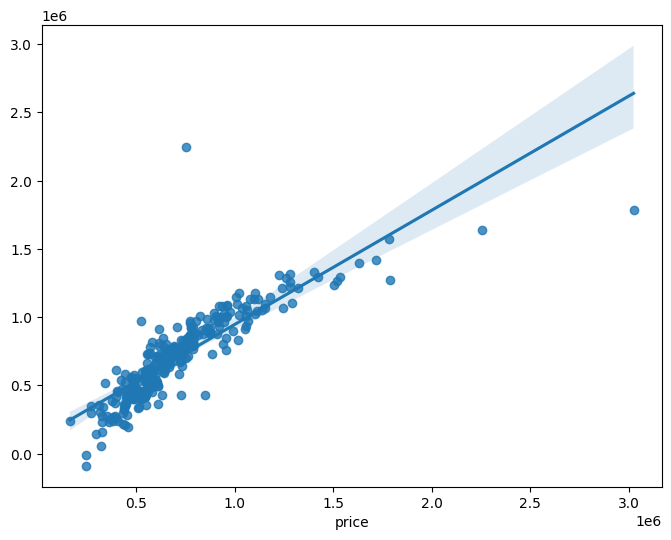

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))

# Specify x and y explicitly
sns.regplot(x=y_expected, y=y_predict, ax=ax)

plt.show()

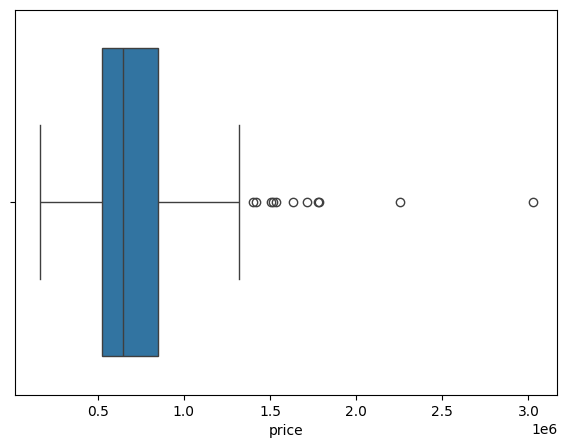

In [32]:
fig, ax = plt.subplots(figsize=(7,5))

sns.boxplot(x=y_expected);

### Computando as métricas para o modelo ajustado.

In [39]:
def adjusted_r2(y_expected, y_predict, X_train):
    R2 = r2_score(y_expected, y_predict)
    N = len(y_expected)
    p = X_train.shape[1]

    adjusted_r2 = (1 - ((1 - R2) * (N - 1)) / (N - p - 1))
    return adjusted_r2

adjusted_r2 = adjusted_r2(y_expected, y_predict, X_train)
print('R2 Ajustado:', adjusted_r2)
print()

mae = mean_absolute_error(y_expected, y_predict)
print('MAE:', mae)
print()

mse = mean_squared_error(y_expected, y_predict)
print('MSE:', mse)
print()

rmse = mean_squared_error(y_expected, y_predict, squared=False)
print('RMSE:', rmse)
print()

# Ensure no negative values
y_expected = np.clip(y_expected, 0, None)
y_predict = np.clip(y_predict, 0, None)
rmsle = mean_squared_log_error(y_expected, y_predict, squared=False)
print('RMSLE:', rmsle)
print()

m_error = max_error(y_expected, y_predict)
print('Max Error:', m_error)
print()

mape = mean_absolute_percentage_error(y_expected, y_predict)
print('MAPE:', mape)
print()

R2 Ajustado: 0.7117568909324961

MAE: 102397.26762301271

MSE: 28099560293.10443

RMSE: 167629.23460155877

RMSLE: 1.0539323247545376

Max Error: 1495092.1811175235

MAPE: 0.15840792034740034



In [ ]:
#